In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import pydicom as dicom
from pathlib import Path
import os
print(os.getcwd())

/kaggle/working


In [8]:
IMG_PATH= Path("/kaggle/input/") #siim-medical-images/")
print(IMG_PATH)

/kaggle/input


In [9]:
data_df = pd.read_csv(IMG_PATH/"overview.csv") #환자 ID, 성별, 나이, 검사 여부 등의 정보가 담긴 파일


data_df.head()

Unnamed: 0  Age  Contrast ContrastTag  \
0           0   60      True        NONE   
1           1   69      True        NONE   
2           2   74      True     APPLIED   
3           3   75      True        NONE   
4           4   56      True        NONE   

                                      raw_input_path  id  \
0   ../data/50_50_dicom_cases\Contrast\00001 (1).dcm   0   
1  ../data/50_50_dicom_cases\Contrast\00001 (10).dcm   1   
2  ../data/50_50_dicom_cases\Contrast\00001 (11).dcm   2   
3  ../data/50_50_dicom_cases\Contrast\00001 (12).dcm   3   
4  ../data/50_50_dicom_cases\Contrast\00001 (13).dcm   4   

                            tiff_name                          dicom_name  
0  ID_0000_AGE_0060_CONTRAST_1_CT.tif  ID_0000_AGE_0060_CONTRAST_1_CT.dcm  
1  ID_0001_AGE_0069_CONTRAST_1_CT.tif  ID_0001_AGE_0069_CONTRAST_1_CT.dcm  
2  ID_0002_AGE_0074_CONTRAST_1_CT.tif  ID_0002_AGE_0074_CONTRAST_1_CT.dcm  
3  ID_0003_AGE_0075_CONTRAST_1_CT.tif  ID_0003_AGE_0075_CONTRAST_1_CT.dcm  
4  ID_0004_AGE_0056_CONTRAST_1_CT.tif  ID_0004_AGE_0056_CONTRAST_1_CT.dcm

In [10]:
data_df.keys() #columns 확인

Index(['Unnamed: 0', 'Age', 'Contrast', 'ContrastTag', 'raw_input_path', 'id',
       'tiff_name', 'dicom_name'],
      dtype='object')

In [11]:
#데이터 로딩 안되어서 경로 확인

import os
for root, dirs, files in os.walk("/kaggle/input/"):
    print(root)
    for f in files:
        print("   -", f)

/kaggle/input/
   - full_archive.npz
   - overview.csv
/kaggle/input/dicom_dir
   - ID_0015_AGE_0061_CONTRAST_1_CT.dcm
   - ID_0019_AGE_0070_CONTRAST_1_CT.dcm
   - ID_0063_AGE_0073_CONTRAST_0_CT.dcm
   - ID_0077_AGE_0074_CONTRAST_0_CT.dcm
   - ID_0073_AGE_0074_CONTRAST_0_CT.dcm
   - ID_0060_AGE_0080_CONTRAST_0_CT.dcm
   - ID_0051_AGE_0063_CONTRAST_0_CT.dcm
   - ID_0091_AGE_0072_CONTRAST_0_CT.dcm
   - ID_0004_AGE_0056_CONTRAST_1_CT.dcm
   - ID_0076_AGE_0068_CONTRAST_0_CT.dcm
   - ID_0055_AGE_0071_CONTRAST_0_CT.dcm
   - ID_0000_AGE_0060_CONTRAST_1_CT.dcm
   - ID_0089_AGE_0071_CONTRAST_0_CT.dcm
   - ID_0036_AGE_0074_CONTRAST_1_CT.dcm
   - ID_0066_AGE_0082_CONTRAST_0_CT.dcm
   - ID_0078_AGE_0066_CONTRAST_0_CT.dcm
   - ID_0064_AGE_0058_CONTRAST_0_CT.dcm
   - ID_0030_AGE_0076_CONTRAST_1_CT.dcm
   - ID_0016_AGE_0063_CONTRAST_1_CT.dcm
   - ID_0052_AGE_0072_CONTRAST_0_CT.dcm
   - ID_0081_AGE_0058_CONTRAST_0_CT.dcm
   - ID_0041_AGE_0045_CONTRAST_1_CT.dcm
   - ID_0014_AGE_0071_CONTRAST_1_CT.dcm
 

In [13]:
#DICOM 파일 경로 파싱 함수
def process_data(path):
    dicom_path = IMG_PATH/path
    #.dcm 확장자(DICOM)의 모든 파일 경로 리스트
    data = pd.DataFrame([{'path': filepath} for filepath in dicom_path.glob('*.dcm')])
    # 파일 이름만 추출
    data['file'] = data['path'].map(os.path.basename)
    # 파일명을 _ 기준으로 나눠서 환자 ID 추출, 	나이, 조영제 여부, 촬영 타입(CT, MRI 등) 추출
    data['ID'] = data['file'].map(lambda x: str(x.split('_')[1]))
    data['Age'] = data['file'].map(lambda x: int(x.split('_')[3]))
    data['Contrast'] = data['file'].map(lambda x: bool(int(x.split('_')[5])))
    data['Modality'] = data['file'].map(lambda x: str(x.split('_')[6].split('.')[-2]))
    return data

In [14]:
#dicom_dir 폴더 안에 있는 모든 .dcm 파일을 정리해서 하나의 테이블로 만드는 작업
print("Number of DICOM:", len(str(IMG_PATH/"dicom_dir")))
dicom_data = process_data('dicom_dir')
dicom_data.head()

Number of DICOM: 23


path  \
0  /kaggle/input/dicom_dir/ID_0015_AGE_0061_CONTR...   
1  /kaggle/input/dicom_dir/ID_0019_AGE_0070_CONTR...   
2  /kaggle/input/dicom_dir/ID_0063_AGE_0073_CONTR...   
3  /kaggle/input/dicom_dir/ID_0077_AGE_0074_CONTR...   
4  /kaggle/input/dicom_dir/ID_0073_AGE_0074_CONTR...   

                                 file    ID  Age  Contrast Modality  
0  ID_0015_AGE_0061_CONTRAST_1_CT.dcm  0015   61      True       CT  
1  ID_0019_AGE_0070_CONTRAST_1_CT.dcm  0019   70      True       CT  
2  ID_0063_AGE_0073_CONTRAST_0_CT.dcm  0063   73     False       CT  
3  ID_0077_AGE_0074_CONTRAST_0_CT.dcm  0077   74     False       CT  
4  ID_0073_AGE_0074_CONTRAST_0_CT.dcm  0073   74     False       CT

In [15]:
dicom_data.keys()

Index(['path', 'file', 'ID', 'Age', 'Contrast', 'Modality'], dtype='object')

In [20]:

# DICOM 이미지 16장 미리 보기 해주는 시각화 함수
def show_images(data, dim=16, imtype='dicom'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20)) #4x4 격자로 16장 이미지 출력
    for i,data_row in enumerate(img_data):
        data_row_img = dicom.dcmread(data_row['path']) #실제 DICOM 파일을 열어서 이미지 데이터 읽기 (.dcmread로 바뀜)
        ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone)  #CT 스캔 결과 이미지 (숫자로 된 픽셀 값 배열)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {Modality} Age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row)) #이미지 위에 정보 표시 (나이, modality 등)
    plt.show()


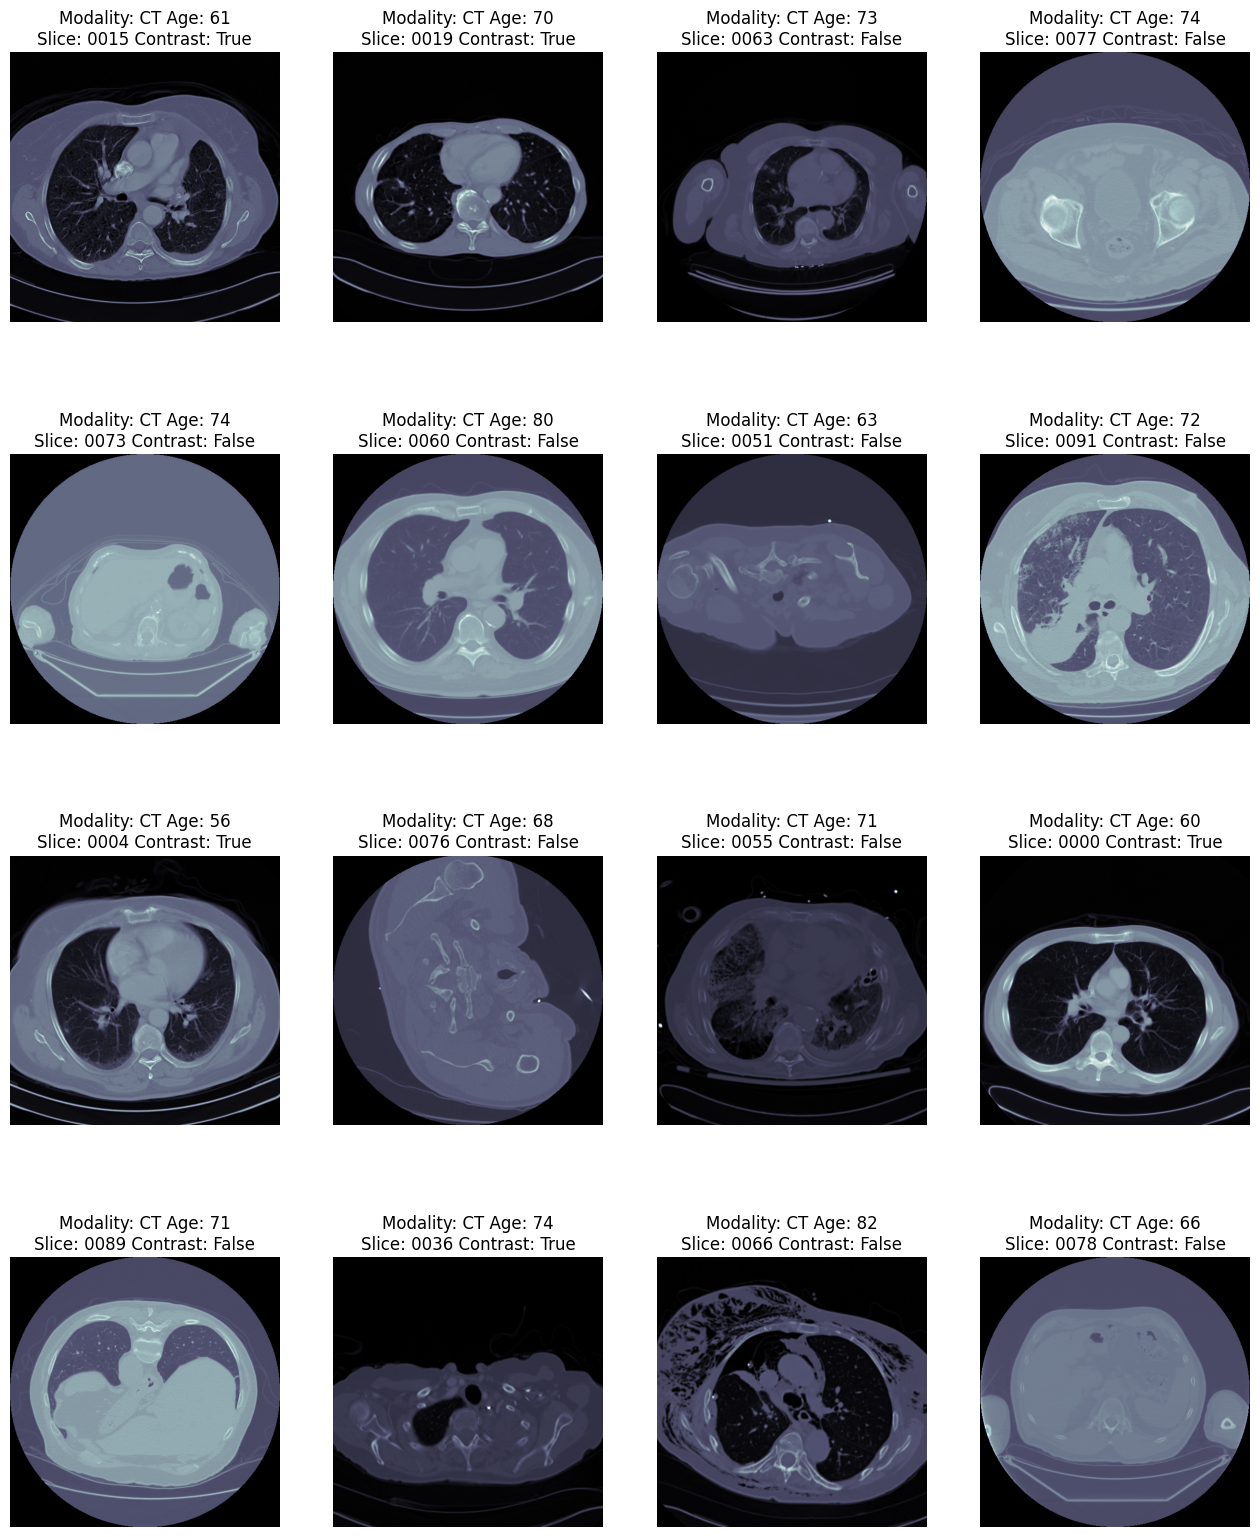

In [21]:
show_images(dicom_data,16,'DICOM')

In [23]:
# DICOM 파일 하나를 열어서 어떤 정보가 들어 있는지 전체 구조를 보는 단계
## preprocessing

#	DICOM 파일 중 첫 번째 파일 경로 가져오기
# 해당 DICOM 파일을 열고 메타데이터 + 픽셀 데이터 모두 불러옴
#dicom_dataset = CT 스캔 한 장의 전체 정보 (환자 ID, 촬영 장비, 픽셀 등 포함)
dicom_dataset = dicom.dcmread(dicom_data['path'].iloc[0])
dicom_dataset

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.612696157451530634003461974920
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008,0000) Group Length                        UL: 458
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.6

# Resample and get HU 

In [24]:
def get_pixels_hu(slices):
    # 1. 픽셀을 모아서 3D 배열로 만들기 ((100, 512, 512) → 슬라이스 100장, 각각 512x512 이미지))
    image = np.stack([s.pixel_array for s in slices])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # 2. Set outside-of-scan pixels to 0
    # -2000 같은 이상값 제거 -> 0
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    
    # Convert to Hounsfield units (HU)
    for slice_number in range(len(slices)):
        
        intercept = slices[slice_number].RescaleIntercept #픽셀값에 더해지는 상수
        slope = slices[slice_number].RescaleSlope #CT 기계에서 픽셀값에 곱해지는 비율
        
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
            
        image[slice_number] += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)

# CT 슬라이스(컷)들을 리스트로 불러오기
def load_scan(path):
    slices = [dicom.dcmread(s) for s in path]
#     slices.sort(key = lambda x: float(x.ImagePositionPatient[2])) #슬라이스가 어느 위치인지 (z 방향 위치)
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness # 슬라이스 간 두께를 저장 (후에 3D 만들 때 중요)
        
    return slices

import scipy
# resample = pixel spacing 조절
# 픽셀 간 간격 맞추기 (보통 1mm 간격) -> CT 데이터를 정사각형 정육면체로 맞춰서 3D 모델링, 딥러닝 등에 사용할 수 있게 정규화하는 거야.
def resample(image, scan, new_spacing=[1,1,1]):
    # Determine current pixel spacing
    c_float = lambda x : [float(i) for i in x]
    spacing = np.array([float(1)] + c_float(scan.PixelSpacing), dtype=np.float32) # PixelSpacing = 한 픽셀이 몇 mm에 해당하는지 (보통 [0.7, 0.7] 같은 값)
    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor
    
    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
    # scipy.ndimage.interpolation.zoom -> 이미지를 확대/축소(resize) 해주는 함수야.
    # real_resize_factor -> 각 축(z, y, x)에 대해 얼마만큼 리사이즈할지 정한 비율 리스트야.
    # real_resize_factor = [1.5, 0.5, 0.5] -> z축 방향: 1.5배 확대, y축, x축 방향: 0.5배 축소, 픽셀 간 간격(spacing)**을 맞추기 위해서 이렇게 조절해주는 거야!
    # 리사이즈할 때 새 픽셀 값을 어떻게 채울지 정하는 방식이야.'nearest'는 가장 가까운 픽셀 값을 그대로 복사해와.
    return image, new_spacing


In [25]:
scan_dataset = load_scan(dicom_data['path'].to_list())
hu_value = get_pixels_hu(scan_dataset)

In [27]:
# (0028,0030) 이 태그는 DICOM 표준에서 Pixel Spacing 의미

dicom_dataset = dicom.dcmread(dicom_data['path'].iloc[0])
print(dicom_dataset[('0028', '0030')].value)

[006.562500e-01, 006.562500e-01]


In [29]:
dicom_dataset = dicom.dcmread(dicom_data['path'].iloc[2])
print(dicom_dataset[('0028', '0030')].value) #  이 CT 영상의 한 픽셀은 가로/세로 약 0.98mm 크기

[0.9765625, 0.9765625]


In [30]:
slice_n = 80
dicom_dataset = dicom.dcmread(dicom_data['path'].iloc[slice_n])
dicom_dataset[('0028', '0030')].value

[006.757812e-01, 006.757812e-01]

🔄 왜 여러 슬라이스에서 다르게 나올까?
CT는 여러 슬라이스로 이루어진 3D 볼륨이잖아요?

그중 몇 슬라이스는 픽셀 간 간격이 조금 다를 수 있음

그래서 이렇게 각 슬라이스마다 확인해서 일관성 있는지 확인하는 거예요



In [31]:
pix_resampled, spacing = resample(hu_value[[slice_n]], scan_dataset[slice_n], [1,1,1])
print("Shape before resampling\t", hu_value[[slice_n]].shape)
print("Shape after resampling\t", pix_resampled.shape)


/tmp/ipykernel_36/816925107.py:53: DeprecationWarning: Please import `zoom` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')


Shape before resampling	 (1, 512, 512)
Shape after resampling	 (1, 346, 346)


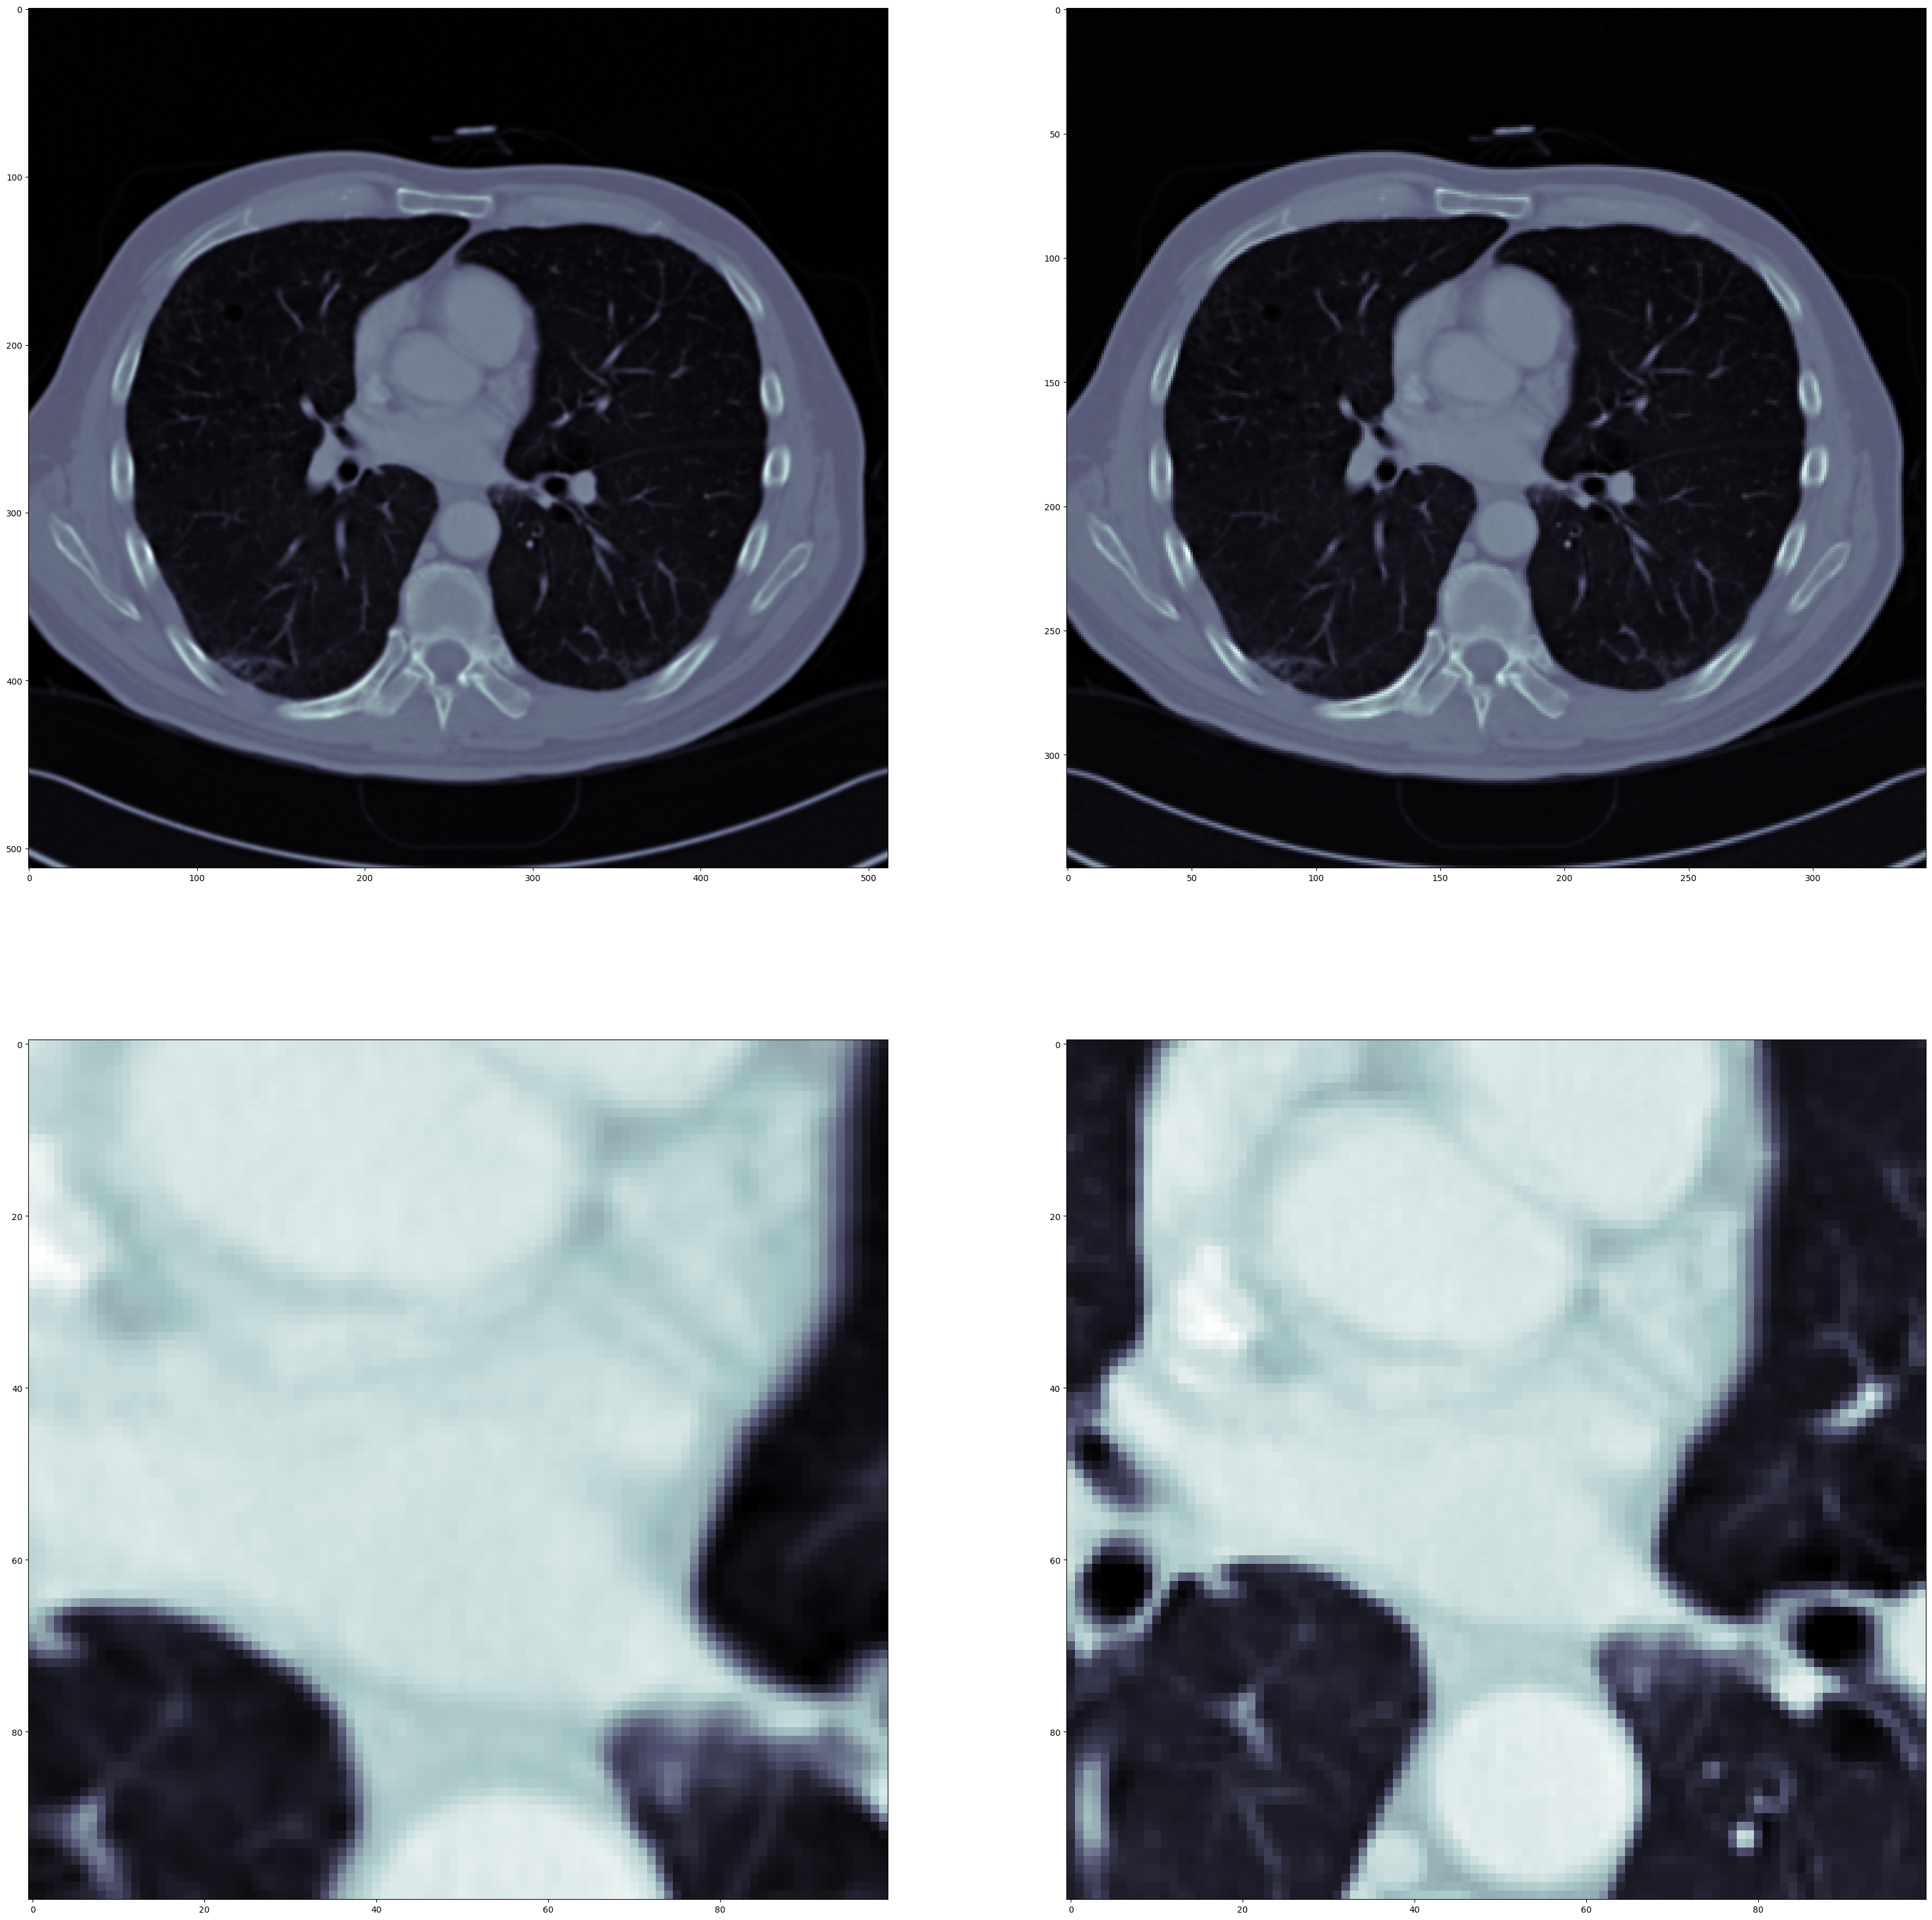

In [32]:

#print(data)
fig,axs = plt.subplots(2,2,figsize=(40,40))

axs[0,0].imshow(hu_value[slice_n], cmap=plt.cm.bone)
axs[0,0].grid(False)

axs[0,1].imshow(pix_resampled[0], cmap=plt.cm.bone)
axs[0,1].grid(False)

w,h = hu_value[slice_n].shape
w/=2
h/=2
w,h = int(w),int(h)
axs[1,0].imshow(hu_value[slice_n][h-50:h+50,w-50:w+50], cmap=plt.cm.bone)
axs[1,0].grid(False)

w,h = pix_resampled[0].shape
w/=2
h/=2
w,h = int(w),int(h)
axs[1,1].imshow(pix_resampled[0,h-50:h+50,w-50:w+50], cmap=plt.cm.bone)
axs[1,1].grid(False)




# 원하는 hu값으로 이미지를 보는 것이 중요

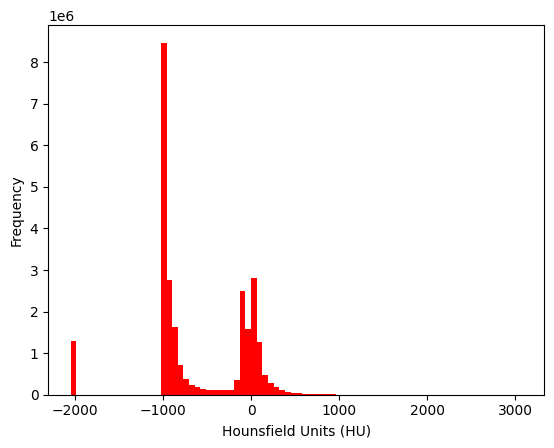

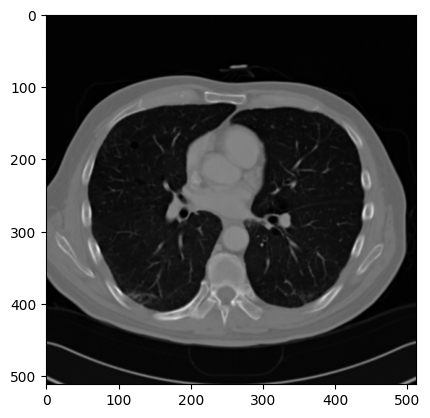

In [34]:
#HU 값 히스토그램 만들기
plt.hist(hu_value.flatten(), bins=80, color='r')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

plt.imshow(hu_value[80], cmap=plt.cm.gray)
plt.show()
# # Show some slice in the middle
# plt.imshow(first_patient_pixels[80], cmap=plt.cm.gray)
# plt.show()

In [35]:
# 원하는 HU값
#DICOM CT 이미지를 사람이 볼 수 있게 만드는 핵심 전처리
#CT 원본 데이터 문제
#CT의 픽셀값은 보통 HU(Hounsfield Unit)이라는 단위예요.
#이 값은 -1000(공기)부터 +1000 이상(뼈)까지 다양해요.
#근데 모니터는 0255(또는 01)만 표현할 수 있음!
#→ 그래서 윈도잉(windowing)으로 범위를 조정해줘야 해요.

#-> hu값 범위 조정을 위해 windowing 진행


#window center: 중심 HU 값
#window width: 표현하고 싶은 HU 범위
#예, center=40, width=400이면, HU -160~240만 보여주자는 의미
def window_image(img, window_center,window_width, intercept, slope):

    img = (img*slope +intercept)
    img_min = window_center - window_width//2
    img_max = window_center + window_width//2
    # 너무 밝거나 어두운 값은 잘라내고,이 범위만 시각화용으로 남기는 것!
    img[img<img_min] = img_min 
    img[img>img_max] = img_max
    return img 
    
    
# DICOM 메타데이터는 어떤 경우는 리스트, 어떤 경우는 단일값이에요.
# 항상 [0]을 쓸 수 없고, 이런 식으로 일반화 시켜야 해요:
def get_first_of_dicom_field_as_int(x):
    #get x[0] as in int is x is a 'pydicom.multival.MultiValue', otherwise get int(x)
    if type(x) == dicom.multival.MultiValue:
        return int(x[0])
    else:
        return int(x)

# 윈도잉에 필요한 값 뽑는 함수 (DICOM 파일에서 메타데이터 뽑고)
def get_windowing(data):
    dicom_fields = [data[('0028','1050')].value, #window center
                    data[('0028','1051')].value, #window width
                    data[('0028','1052')].value, #intercept
                    data[('0028','1053')].value] #slope
    return [get_first_of_dicom_field_as_int(x) for x in dicom_fields]


#CT 이미지는 너무 많은 밝기 정보를 담고 있어서, 조리개 조정하듯 특정 부분만 보이게 조절해줘야 함. → 이게 바로 "윈도잉"!

In [36]:
get_windowing(dicom_dataset)

[30, 400, -1024, 1]

In [37]:
w_center, w_width, intercept, slope = get_windowing(dicom_dataset)

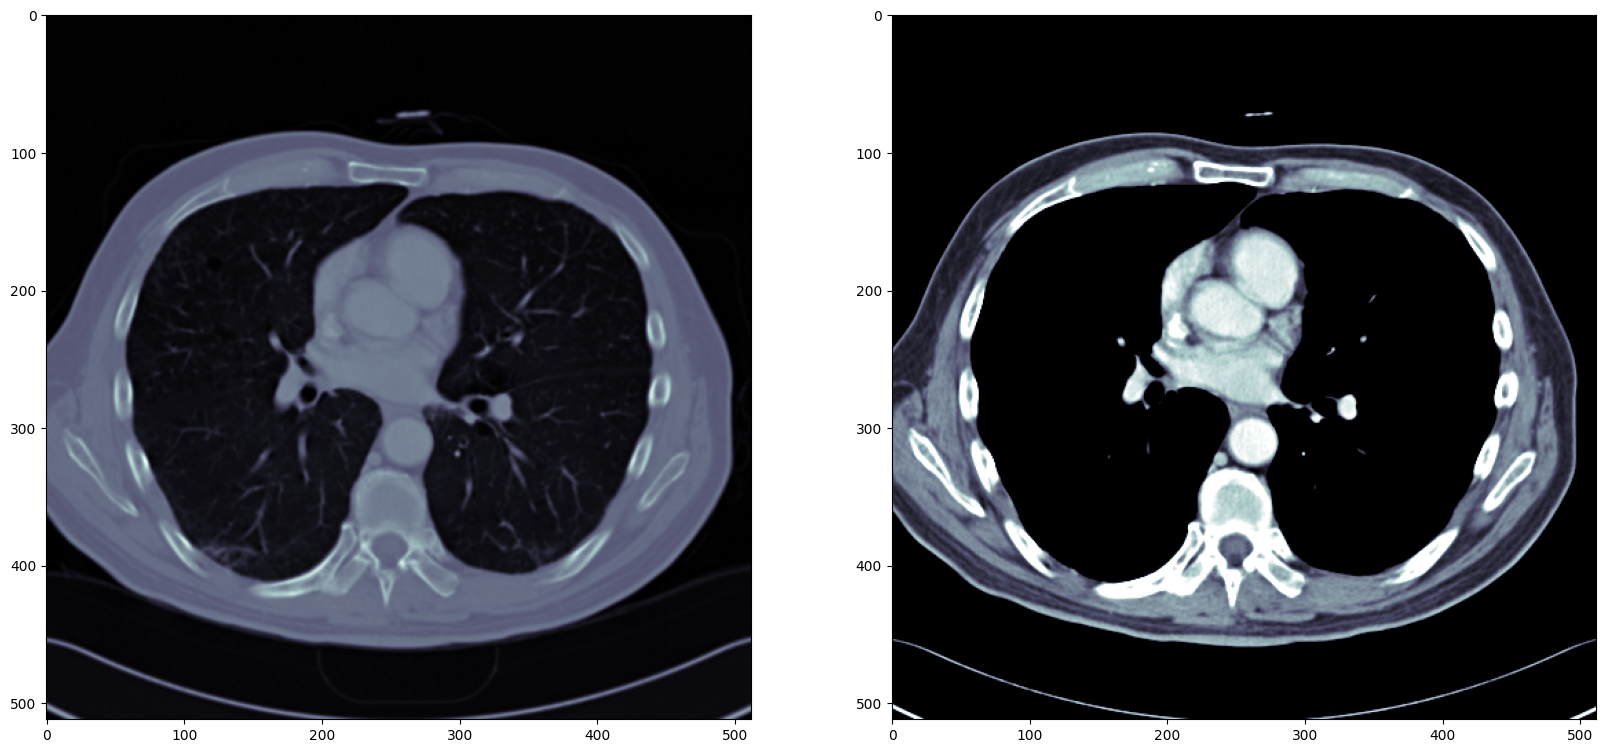

In [39]:
import pydicom
import matplotlib.pyplot as plt
dicom_dataset = scan_dataset[80]
#print(data)
fig,axs = plt.subplots(1,2,figsize=(20,40))
window_center , window_width, intercept, slope = get_windowing(dicom_dataset)

#displaying the image
img = dicom_dataset.pixel_array
axs[0].imshow(img, cmap='bone') #gray
axs[0].grid(False)
img = window_image(img, window_center, window_width, intercept, slope)
axs[1].imshow(img, cmap='bone')
axs[1].grid(False)

# hu normalization 통해서 밝은 부분이 더 잘보임

In [41]:
def show_images(data, dim=16, imtype='TIFF'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):
        data_row_img = dicom.dcmread(data_row['path'])
        window_center , window_width, intercept, slope = get_windowing(data_row_img)
        img = data_row_img.pixel_array
        img = window_image(img, window_center, window_width, intercept, slope)
        
        ax[i//4, i%4].imshow(img, cmap=plt.cm.bone) 
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {Modality} Age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row))
    plt.show()


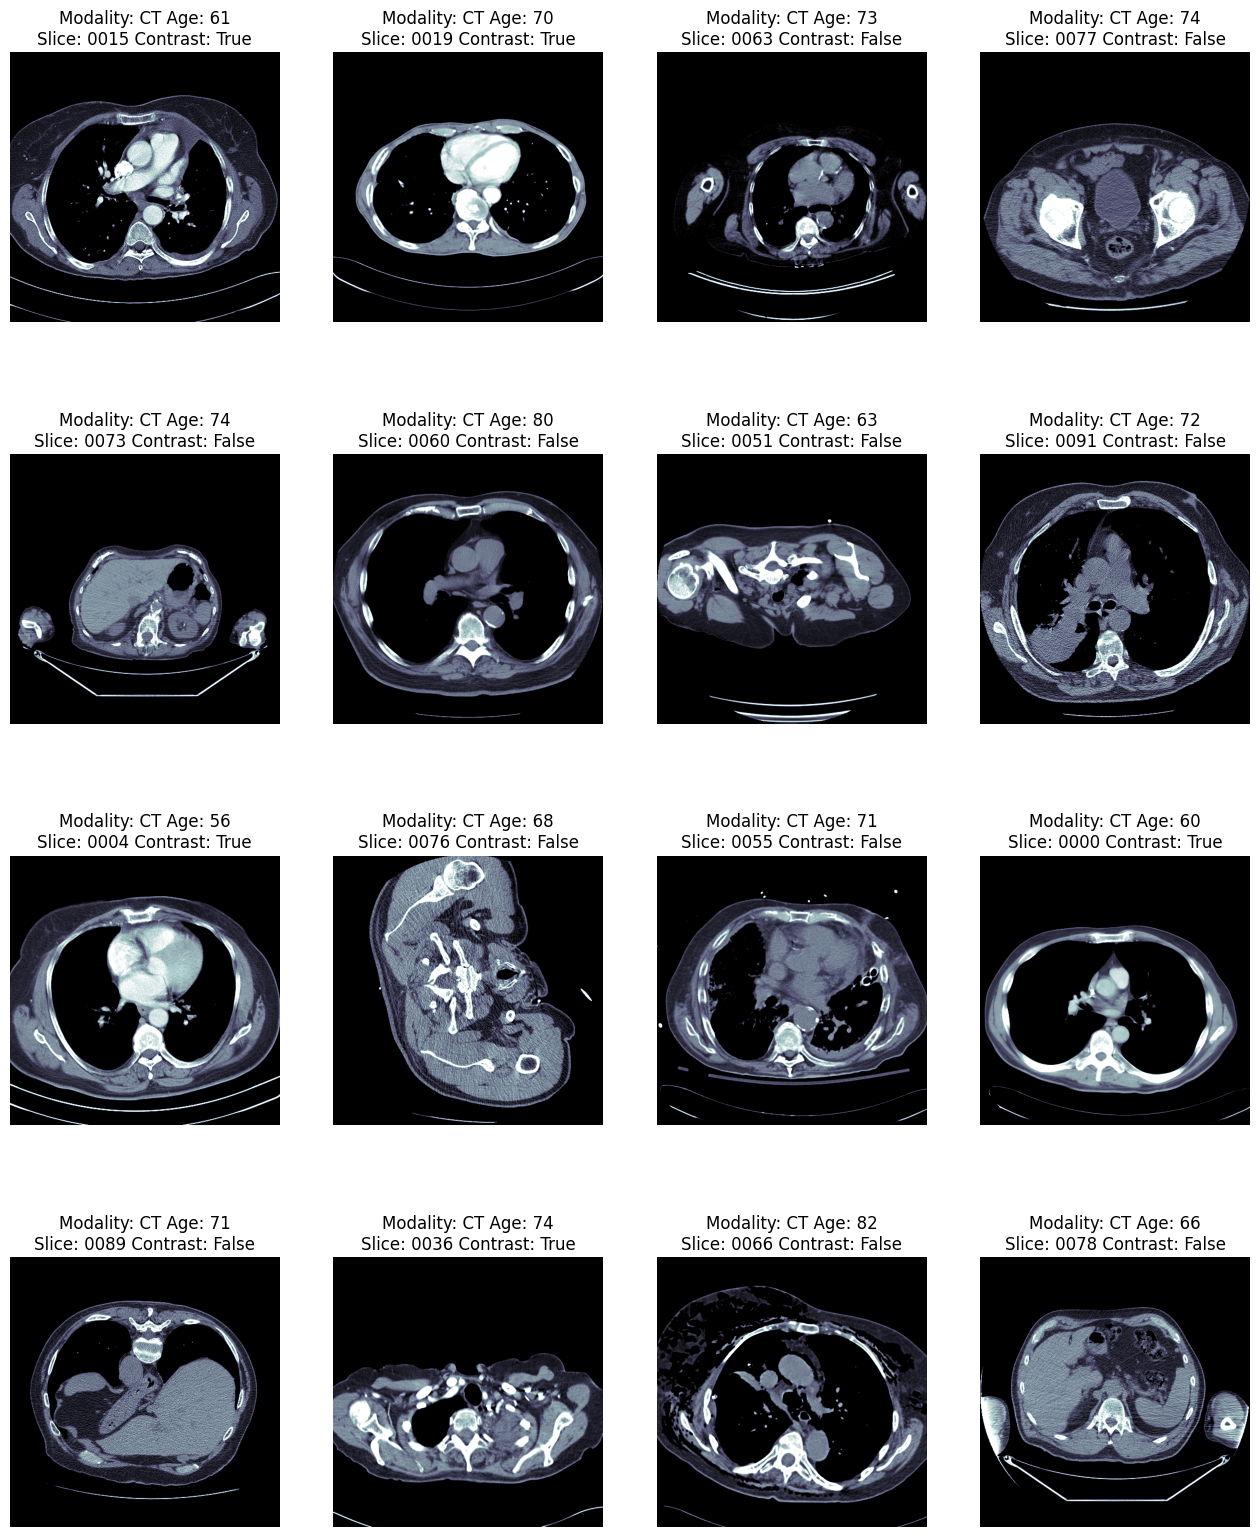

In [42]:
show_images(dicom_data,16,'DICOM')

In [43]:
window_center , window_width, intercept, slope

(30, 400, -1024, 1)

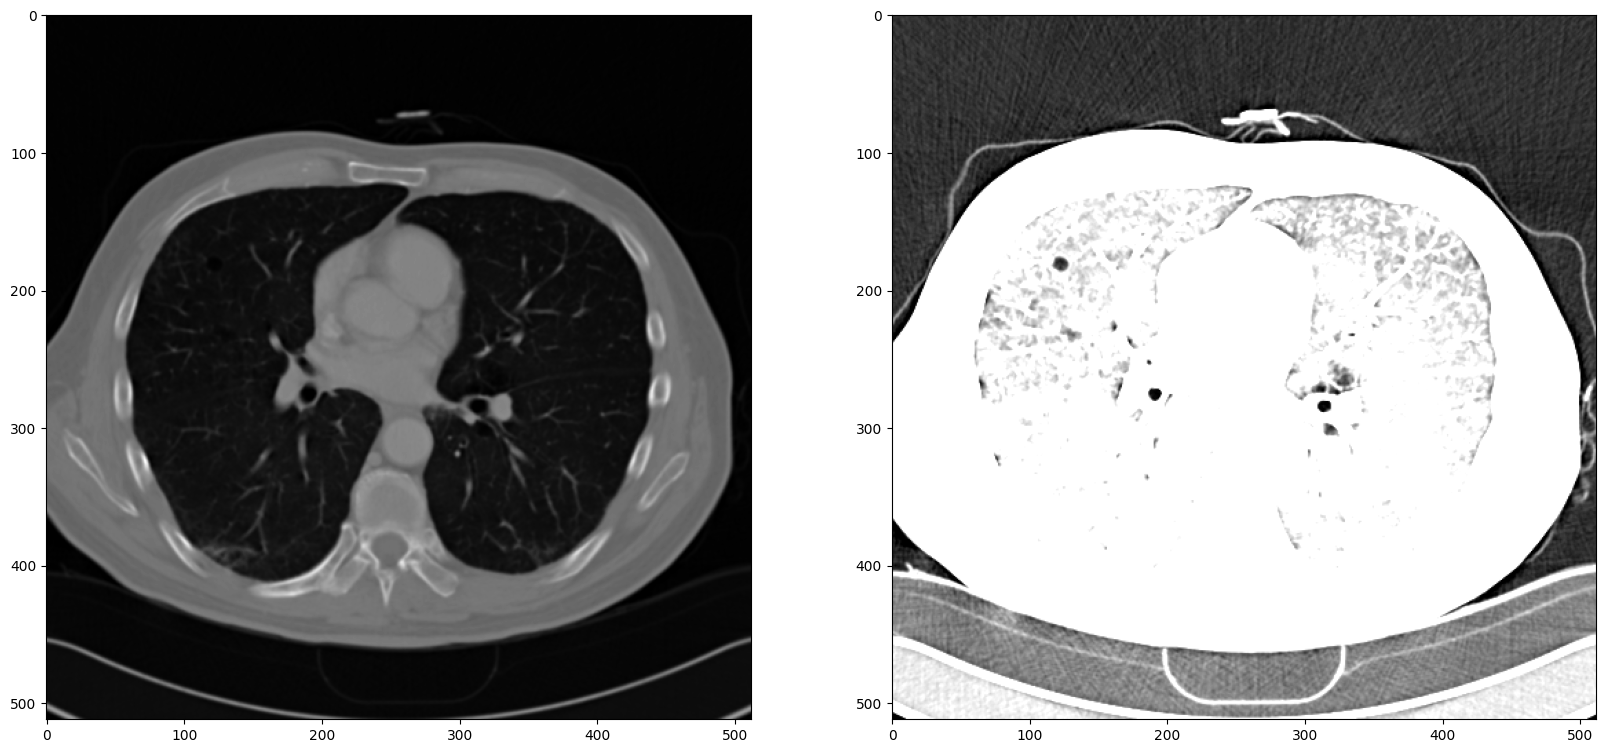

In [44]:
import pydicom
import matplotlib.pyplot as plt
dicom_dataset = scan_dataset[80]
#print(data)
fig,axs = plt.subplots(1,2,figsize=(20,40))
# window_center , window_width, intercept, slope = get_windowing(dicom_dataset)
window_center , window_width, intercept, slope = -1000 , 200, -1024, 1

#displaying the image
img = dicom_dataset.pixel_array
axs[0].imshow(img, cmap='gray')
axs[0].grid(False)
img = window_image(img, window_center, window_width, intercept, slope)
axs[1].imshow(img, cmap='gray')
axs[1].grid(False)

- windwing에는 window_center, window_width, intercept, slope 을 통해 HU value 조정이 중요
- 이미지 리스케일링, pixel spacing,
- 